In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [10]:
df = pd.read_csv('app_train_cleaned.csv')

df = df.loc[0:150]

df

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,25.920548,10,WEDNESDAY,-2120,-3648.0,-9461,0.018801,Single / not married,406597.5,202500.0,Business Entity Type 3,100002,1
1,1.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,45.931507,11,MONDAY,-291,-1186.0,-16765,0.003541,Married,1293502.5,270000.0,School,100003,0
2,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,52.180822,9,MONDAY,-2531,-4260.0,-19046,0.010032,Single / not married,135000.0,67500.0,Government,100004,0
3,2.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,52.068493,17,WEDNESDAY,-2437,-9833.0,-19005,0.008019,Civil marriage,312682.5,135000.0,Business Entity Type 3,100006,0
4,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,54.608219,11,THURSDAY,-3458,-4311.0,-19932,0.028663,Single / not married,513000.0,121500.0,Religion,100007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.0,1.0,0.636395,675000.0,26725.5,1.0,-1166.0,31.871233,17,TUESDAY,-3851,-5430.0,-11633,0.024610,Single / not married,781920.0,117000.0,Government,100173,0
147,0.0,0.0,0.704793,225000.0,11250.0,4.0,-307.0,39.991781,15,FRIDAY,-3681,-8491.0,-14597,0.032561,Married,225000.0,180000.0,Self-employed,100174,0
148,0.0,0.0,0.763649,1080000.0,45067.5,3.0,-1683.0,44.646575,19,TUESDAY,-4568,-164.0,-16296,0.010147,Civil marriage,1251072.0,202500.0,Industry: type 7,100175,0
149,1.0,1.0,0.585291,900000.0,31653.0,2.0,-131.0,48.443836,6,WEDNESDAY,-1211,-2630.0,-17682,0.010006,Married,1078200.0,135000.0,Government,100176,0


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

for i in df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    #print(train_df[i])
    df[i].fillna(df[i].mode()[0], inplace=True)
    df[i]= enc.fit_transform(df[[i]])


#Standerization
scaler = StandardScaler()
app_train_scaled = scaler.fit_transform(df.drop(columns='TARGET'))
app_train_df = pd.DataFrame(app_train_scaled, index=df.index, columns=df.drop(columns='TARGET').columns)
app_train_df['TARGET'] = df['TARGET']
app_train_df

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,0.375264,0.378611,-1.346562,-0.517737,-0.126645,-1.270285,-0.254876,-1.497355,-0.524988,1.379265,0.461241,0.359864,1.497355,-0.172882,1.504414,-0.486588,0.417440,-1.200996,-1.701386,1
1,-0.101766,-0.098630,0.481822,1.707843,0.661577,-0.141973,0.133285,0.239159,-0.220091,-0.934835,1.697880,1.163858,-0.239159,-1.335218,-0.388640,1.821603,1.180579,0.493076,-1.681645,0
2,-0.578797,-0.575870,0.144264,-1.135240,-1.413149,-1.270285,0.149775,0.781463,-0.829885,-0.934835,0.183352,0.160008,-0.781463,-0.840806,1.504414,-1.193427,-1.108839,-0.777478,-1.661904,0
3,0.375264,0.378611,0.625305,-0.672113,0.230699,-0.141973,0.400938,0.771716,1.609290,1.379265,0.246908,-1.659917,-0.771716,-0.994134,-1.335167,-0.731004,-0.345700,-1.200996,-1.622422,0
4,-0.578797,-0.575870,-1.042306,-0.054611,-0.329828,-1.270285,-0.219358,0.992108,-0.220091,0.453625,-0.443419,0.143354,-0.992108,0.578295,1.504414,-0.209673,-0.498328,0.323669,-1.602681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.101766,-0.098630,0.553825,0.408516,0.018486,-1.270285,-0.295468,-0.980966,1.609290,0.916445,-0.709138,-0.222068,0.980966,0.269583,1.504414,0.490197,-0.549204,-0.777478,1.674324,0
147,-0.578797,-0.575870,0.901887,-0.877947,-1.090636,2.114651,0.794174,-0.276279,0.999496,-1.397656,-0.594196,-1.221672,0.276279,0.875201,-0.388640,-0.959200,0.163060,0.747187,1.694065,0
148,-0.578797,-0.575870,1.201389,1.566333,1.333049,0.986339,-0.951283,0.127655,2.219084,0.916445,-1.193922,1.497603,-0.127655,-0.832046,-1.335167,1.711176,0.417440,-0.269257,1.713806,0
149,-0.101766,-0.098630,0.293766,1.051747,0.371637,-0.141973,1.017430,0.457174,-1.744575,1.379265,1.075841,0.692303,-0.457174,-0.842786,-0.388640,1.261273,-0.345700,-0.777478,1.733547,0


In [12]:
X = app_train_df.drop(columns = ['TARGET'])
y = app_train_df['TARGET']

In [13]:
#Handeling Nan values on training set
# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

y = y.to_numpy(dtype=int)
y = y.reshape(-1, 1)

# Need to impute missing values
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baging Model with several decision trees

In [15]:
from IPython.core.debugger import set_trace


import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

plt.style.use(style="seaborn")
%matplotlib inline

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [17]:
model = BaggingClassifier()


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

print(
    f"Mean Accuracy: {np.mean(score):.3f}\nStd: {np.std(score):.3f}\n"
)

Mean Accuracy: 0.921
Std: 0.026



## Hyperparameters

### Number of Trees

In [23]:
res = {}
for i in [10, 25, 50, 100, 200, 400, 800]:
    model = BaggingClassifier(n_estimators=i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)
    res[f'{i}'] = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

In [24]:
res

{'10': array([0.88235294, 0.92      , 0.92      , 0.94117647, 0.9       ,
        0.96      ]),
 '25': array([0.90196078, 0.88      , 0.94      , 0.94117647, 0.9       ,
        0.96      ]),
 '50': array([0.90196078, 0.88      , 0.94      , 0.94117647, 0.9       ,
        0.92      ]),
 '100': array([0.88235294, 0.88      , 0.96      , 0.94117647, 0.9       ,
        0.96      ]),
 '200': array([0.88235294, 0.88      , 0.96      , 0.94117647, 0.9       ,
        0.96      ]),
 '400': array([0.88235294, 0.88      , 0.94      , 0.94117647, 0.9       ,
        0.94      ]),
 '800': array([0.88235294, 0.88      , 0.96      , 0.94117647, 0.9       ,
        0.96      ])}

In [25]:
list(res.keys())

['10', '25', '50', '100', '200', '400', '800']

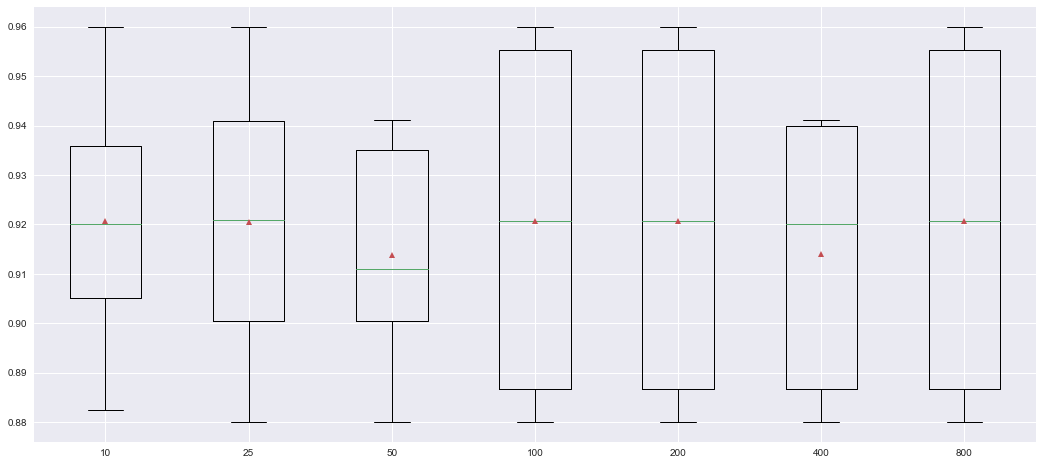

In [26]:
plt.figure(1, figsize=(16, 8))
_ = plt.boxplot(res.values(), labels=res.keys(), showmeans=True)

###  Size of bootstrap sample

The number of samples to draw (with replacement).

We can pass this as a ratio of the original data from 0 to 1, 1 (100%) being the default.

In [27]:
sam = {}
for i in [.1, .25, .5, .75, 1.]:
    model = BaggingClassifier(n_estimators=100, max_samples=i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)
    sam[f'{i*100}%'] = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

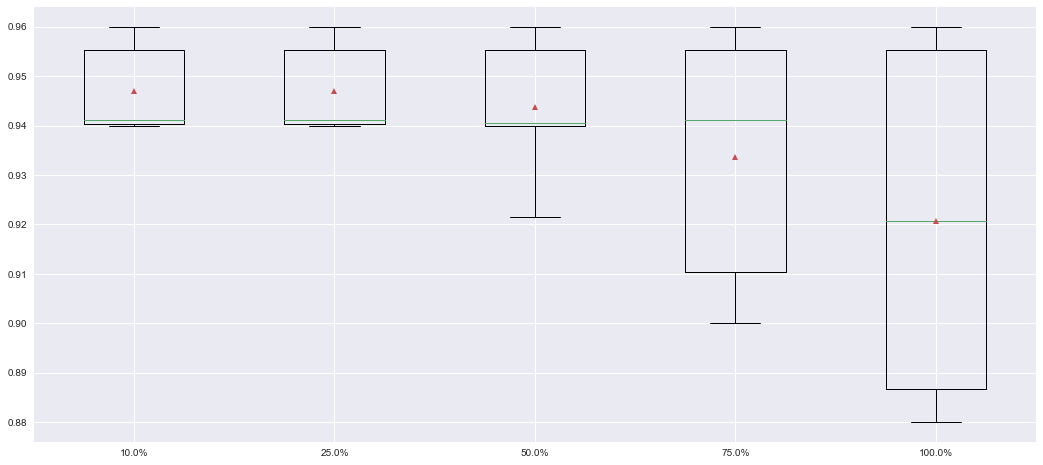

In [28]:
plt.figure(1, figsize=(16, 8))
_ = plt.boxplot(sam.values(), labels=sam.keys(), showmeans=True)

### Conclusion

The best baggigng Model for our data has 100 trees and 100% of samples

In [35]:
final_bagging_model = model = BaggingClassifier(n_estimators=50)

In [36]:
final_bagging_model.fit(X_train,y_train)


BaggingClassifier(n_estimators=50)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

y_test_predicted = final_bagging_model.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.0
Recall score: 0.0
Accuracy score: 0.935
F1 score: 0.0
AUC score: 0.5
